In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

In [2]:

# select random points
def init_centroids(X, k):
   m, n = X.shape
   centroids = np.zeros((k, n))
   idx = np.random.randint(0, m, k)  #
   
   for i in range(k):
       centroids[i,:] = X[idx[i],:]
   
   return centroids


# 3centroid function // selection
def find_closest_centroids(X, centroids):
   m = X.shape[0]
   k = centroids.shape[0]
   idx = np.zeros(m)
   
   
   for i in range(m):
       min_dist = 1000000
       for j in range(k):
           dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
           if dist < min_dist:
               min_dist = dist
               idx[i] = j
   
   return idx

# centroid maker
def compute_centroids(X, idx, k):
   m, n = X.shape
   centroids = np.zeros((k, n))
   
   for i in range(k): #k == o /1 /2 
       indices = np.where(idx == i)
       centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
   
   return centroids

# k means function
def run_k_means(X, initial_centroids,  ):
   m, n = X.shape
   k = initial_centroids.shape[0]
   idx = np.zeros(m)
   centroids = initial_centroids
   
   for i in range(max_iters):
       idx = find_closest_centroids(X, centroids) # selection 
       centroids = compute_centroids(X, idx, k)   
   
   return idx, centroids




def pca(X):
   # normalize the features
   X = (X - X.mean()) / X.std()
   
   # compute the covariance matrix
   X = np.matrix(X)
   cov = (X.T * X) / X.shape[0]
#    print('cov \n', cov)
#    print()
   # perform SVD
   U, S, V = np.linalg.svd(cov) # singular value decomposition
   
   return U, S, V

def project_data(X, U, k):
   U_reduced = U[:,:k]
   return np.dot(X, U_reduced)



def recover_data(Z, U, k):
   U_reduced = U[:,:k]
   return np.dot(Z, U_reduced.T)


(50, 2)
[[3.38156267 3.38911268]
 [4.52787538 5.8541781 ]
 [2.65568187 4.41199472]
 [2.76523467 3.71541365]
 [2.84656011 4.17550645]
 [3.89067196 6.48838087]
 [3.47580524 3.63284876]
 [5.91129845 6.68076853]
 [3.92889397 5.09844661]
 [4.56183537 5.62329929]
 [4.57407171 5.39765069]
 [4.37173356 5.46116549]
 [4.19169388 4.95469359]
 [5.24408518 4.66148767]
 [2.8358402  3.76801716]
 [5.63526969 6.31211438]
 [4.68632968 5.6652411 ]
 [2.85051337 4.62645627]
 [5.1101573  7.36319662]
 [5.18256377 4.64650909]
 [5.70732809 6.68103995]
 [3.57968458 4.80278074]
 [5.63937773 6.12043594]
 [4.26346851 4.68942896]
 [2.53651693 3.88449078]
 [3.22382902 4.94255585]
 [4.92948801 5.95501971]
 [5.79295774 5.10839305]
 [2.81684824 4.81895769]
 [3.88882414 5.10036564]
 [3.34323419 5.89301345]
 [5.87973414 5.52141664]
 [3.10391912 3.85710242]
 [5.33150572 4.68074235]
 [3.37542687 4.56537852]
 [4.77667888 6.25435039]
 [2.6757463  3.73096988]
 [5.50027665 5.67948113]
 [1.79709714 3.24753885]
 [4.3225147  5.11

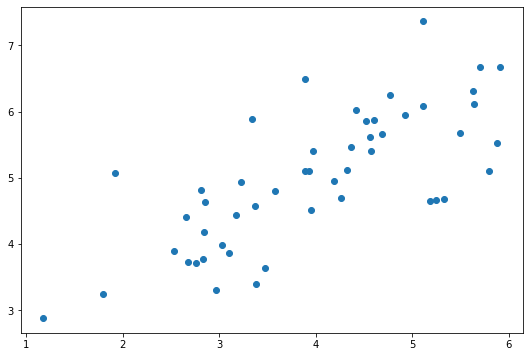

In [4]:
data = loadmat('C:\\Users\\Samira Dihadril\\2-Machine_Learning\\UnSupervisedLearning\\files\\ex7data1.mat')
X = data['X']
print(X.shape)
print(X)
print()

fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(X[:, 0], X[:, 1])


U, S, V = pca(X)
print(U)
print()
print(S)
print()
print(V)



Z = project_data(X, U, 1)
print(Z)




X_recovered = recover_data(Z, U, 1)
print(X_recovered)
print(X_recovered.shape)

